# Writing data to and reading data from a Database using Python

## Libraries and settings

In [1]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Get current working directory
print(os.getcwd())

/workspaces/applied_research_methods/Week_02


## Create sqlite data base

In [2]:
# Create data base
conn = sqlite3.connect('./Data/apartment_database.db') 

# Create cursor object to execute SQL commands
cursor = conn.cursor()

# Show dbs in the directory
flist = fnmatch.filter(os.listdir('.'), '*.db')
for i in flist:
    print(i)

## Create SQL-table in the database

In [3]:
cursor.execute('''CREATE TABLE IF NOT EXISTS apartments_table (OrderId VARCHAR(50),
                                                               Adress VARCHAR(200),
                                                               Rooms DECIMAL(8,2),
                                                               Area INT(8),
                                                               Price DECIMAL(8,2))''')
# Confirm changes to the table
conn.commit()

## Read data from file to data frame

In [4]:
df = pd.read_csv('./Data/apartments_data_prepared.csv',
                  sep=',', 
                  encoding='utf-8')[['web-scraper-order', 'address_raw', 'rooms', 'area', 'price']]
print(df.shape)
df.head(5)

(120, 5)


web-scraper-order                                    address_raw  rooms  \
0      1693993818-1          Am Eulachpark 25, 8404 Winterthur, ZH    6.5   
1      1693993818-2  Katharina Sulzer Platz 2, 8400 Winterthur, ZH    1.0   
2      1693993818-3                            8400 Winterthur, ZH    4.5   
3      1693993818-4  Untere Briggerstrasse 66, 8406 Winterthur, ZH    3.5   
4      1693993818-5      Wülflingerstrasse 25, 8400 Winterthur, ZH    3.5   

    area   price  
0  143.0  3017.0  
1  132.0  3260.0  
2  117.0  3782.0  
3   88.0  2244.0  
4   80.0  1980.0

## Write data to the SQL-table in data base

In [5]:
df.to_sql(name = 'apartments_table',
          con = conn,
          index = False,
          if_exists = 'replace')

120

## Query the SQL-table

In [6]:
# Query the SQL-table
cursor.execute('''SELECT *
               FROM apartments_table
               WHERE rooms >=1''')

df = pd.DataFrame(cursor.fetchall(), 
                  columns=['OrderId','Address','Rooms','Area','Price'])    
df

OrderId                                        Address  Rooms  \
0      1693993818-1          Am Eulachpark 25, 8404 Winterthur, ZH    6.5   
1      1693993818-2  Katharina Sulzer Platz 2, 8400 Winterthur, ZH    1.0   
2      1693993818-3                            8400 Winterthur, ZH    4.5   
3      1693993818-4  Untere Briggerstrasse 66, 8406 Winterthur, ZH    3.5   
4      1693993818-5      Wülflingerstrasse 25, 8400 Winterthur, ZH    3.5   
..              ...                                            ...    ...   
114  1693993832-116        Schiltwiesenweg 24, 8404 Winterthur, ZH    3.0   
115  1693993832-117         Zürcherstrasse 58, 8406 Winterthur, ZH    3.5   
116  1693993832-118            Maienstrasse 8, 8406 Winterthur, ZH    4.5   
117  1693993832-119          Neuwiesenstr. 14, 8400 Winterthur, ZH    1.0   
118  1693993832-120              Steiggasse 3, 8400 Winterthur, ZH    2.5   

      Area   Price  
0    143.0  3017.0  
1    132.0  3260.0  
2    117.0  3782.0  
3     88.0  2244.0  
4     80.0  1980.0  
..     ...     ...  
114   65.0  1030.0  
115  100.0  2180.0  
116   89.0  1985.0  
117   32.0  1005.0  
118   91.0  2115.0  

[119 rows x 5 columns]

## Plot histogramm of rental prices

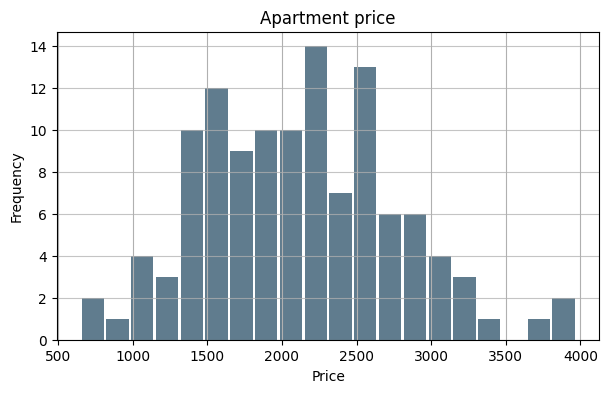

In [7]:
# Create a histogram
plt.figure(figsize=(7,4))
df.Price.plot.hist(grid=True, 
                   bins=20, 
                   rwidth=0.9,
                   color='#607c8e')
plt.title('Apartment price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

## Close db connection (if open)

In [8]:
# Close db connection (if open)
try:
    if check_conn(conn):
        conn.close()
    else:
        pass
except:
    pass

# Status (True = open, False = closed)
print(check_conn(conn))

False


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [9]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-10 11:07:34
Python Version: 3.11.10
-----------------------------------


Additional SQL-queries

In [11]:
# Reopen the database connection
conn = sqlite3.connect('./Data/apartment_database.db') 
cursor = conn.cursor()

# Query the SQL-table
cursor.execute('''SELECT *
               FROM apartments_table
               WHERE rooms >=4 AND area >= 100''')

df = pd.DataFrame(cursor.fetchall(), 
                  columns=['OrderId','Address','Rooms','Area','Price'])    
df

OrderId                                         Address  Rooms  \
0     1693993818-1           Am Eulachpark 25, 8404 Winterthur, ZH    6.5   
1     1693993818-3                             8400 Winterthur, ZH    4.5   
2    1693993818-10              Marktgasse 17, 8400 Winterthur, ZH    4.5   
3    1693993818-12            Hobelwerkweg 39, 8404 Winterthur, ZH    4.5   
4    1693993818-20                             8400 Winterthur, ZH    4.0   
5    1693993822-25     Wässerwiesenstrasse 65, 8408 Winterthur, ZH    4.5   
6    1693993822-31        Ernst-Jung-Gasse 18, 8400 Winterthur, ZH    4.5   
7    1693993822-37       Schlosshofstrasse 19, 8400 Winterthur, ZH    4.5   
8    1693993822-38             Gernstrasse 32, 8409 Winterthur, ZH    5.5   
9    1693993822-39         Endlikerstrasse 65, 8400 Winterthur, ZH    4.5   
10   1693993822-42               Hirschweg 33, 8405 Winterthur, ZH    4.5   
11   1693993822-43            Euelstrasse  56, 8408 Winterthur, ZH    5.5   
12   1693993822-45                             8400 Winterthur, ZH    4.5   
13   1693993826-51               Hegistr. 39f, 8404 Winterthur, ZH    5.5   
14   1693993826-57               Gartenhof 16, 8408 Winterthur, ZH    4.5   
15   1693993826-58           Am Eulachpark 45, 8404 Winterthur, ZH    5.5   
16   1693993826-67            Espenstrasse 91, 8408 Winterthur, ZH    4.5   
17   1693993826-68           Hörnlistrasse 85, 8400 Winterthur, ZH    4.5   
18   1693993826-70       Schlosshofstrasse 21, 8400 Winterthur, ZH    4.5   
19   1693993826-71  Landvogt-Waser-Strasse 69, 8405 Winterthur, ZH    4.5   
20   1693993829-75           Lettenstrasse 27, 8408 Winterthur, ZH    4.5   
21   1693993829-82            Euelstrasse  56, 8408 Winterthur, ZH    5.5   
22   1693993829-83              Im Grüntal 10, 8405 Winterthur, ZH    4.5   
23   1693993829-84           Am Eulachpark 21, 8404 Winterthur, ZH    4.5   
24   1693993829-87    Else-Züblin-Strasse 108, 8404 Winterthur, ZH    4.5   
25   1693993829-92             Magazingasse 2, 8400 Winterthur, ZH    4.5   
26  1693993832-100             Sulzerallee 51, 8404 Winterthur, ZH    4.5   
27  1693993832-103               Hegistr. 41b, 8404 Winterthur, ZH    4.5   
28  1693993832-105               Hegistr. 41e, 8404 Winterthur, ZH    4.5   
29  1693993832-108               Hegistr. 41e, 8404 Winterthur, ZH    4.5   
30  1693993832-115         Zürcherstrasse 135, 8406 Winterthur, ZH    4.5   

     Area   Price  
0   143.0  3017.0  
1   117.0  3782.0  
2   160.0  3200.0  
3   103.0  2470.0  
4   100.0  3125.0  
5   107.0  1750.0  
6   112.0  3970.0  
7   113.0  2700.0  
8   153.0  3059.0  
9   117.0  2270.0  
10  107.0  2928.0  
11  170.0  3900.0  
12  112.0  3360.0  
13  124.0  2560.0  
14  107.0  2550.0  
15  143.0  2680.0  
16  122.0  2550.0  
17  116.0  2950.0  
18  100.0  2600.0  
19  106.0  2290.0  
20  102.0  2530.0  
21  170.0  2980.0  
22  107.0  2500.0  
23  148.0  2580.0  
24  123.0  2966.0  
25  104.0  2820.0  
26  108.0  2430.0  
27  105.0  2390.0  
28  104.0  2280.0  
29  104.0  2310.0  
30  109.0  2730.0

Average Price per roomsize

In [13]:
# Query the SQL-table
cursor.execute('''SELECT rooms, AVG(price)
               FROM apartments_table
               GROUP BY rooms''')

df = pd.DataFrame(cursor.fetchall(), 
                  columns=['rooms','AVG(price)'])    
df

rooms   AVG(price)
0     NaN  1880.000000
1     1.0  1398.333333
2     1.5  1875.000000
3     2.0  1566.666667
4     2.5  1877.923077
5     3.0  1515.375000
6     3.5  2182.125000
7     4.0  2732.500000
8     4.5  2624.103448
9     5.5  3023.166667
10    6.5  3017.000000

Average Area per room size

In [14]:
# Query the SQL-table
cursor.execute('''SELECT rooms, AVG(area)
               FROM apartments_table
               GROUP BY rooms''')

df = pd.DataFrame(cursor.fetchall(), 
                  columns=['rooms','AVG(area)'])    
df

rooms   AVG(area)
0     NaN         NaN
1     1.0   57.500000
2     1.5   34.000000
3     2.0   53.400000
4     2.5   70.040000
5     3.0   64.571429
6     3.5   94.043478
7     4.0   96.000000
8     4.5  110.071429
9     5.5  152.000000
10    6.5  143.000000

Footer Info

In [15]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-10 11:29:16
Python Version: 3.11.10
-----------------------------------
